In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
df_geo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/od2017/Municipios_2017_region.shp")
df = pd.read_parquet("/home/yoshraf/projects/mestrado/data/processed/OD_2017.parquet")
df = df[["Identifica pessoa", "Coordenada X Origem", "Coordenada Y Origem"]]
df = df.dropna()

In [3]:
gdf_origin = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["Coordenada X Origem"], df["Coordenada Y Origem"]))
gdf_origin

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry
0,00010001101,333743.0,7394463.0,POINT (333743.000 7394463.000)
1,00010001101,333104.0,7394476.0,POINT (333104.000 7394476.000)
2,00010001102,333743.0,7394463.0,POINT (333743.000 7394463.000)
3,00010001102,327503.0,7392159.0,POINT (327503.000 7392159.000)
4,00010001102,329431.0,7395939.0,POINT (329431.000 7395939.000)
...,...,...,...,...
183087,05171418104,294735.0,7410561.0,POINT (294735.000 7410561.000)
183088,05171599101,295243.0,7411456.0,POINT (295243.000 7411456.000)
183089,05171599101,295327.0,7410920.0,POINT (295327.000 7410920.000)
183090,05171599102,295243.0,7411456.0,POINT (295243.000 7411456.000)


In [8]:
df_ciclo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/ciclovia/sad6996_ciclovia.shp")
df_ciclo.head(10)

,Name,Descriptio,geometry
0,Ciclovia Caminho Verde,Extensão: 12km<br>Inauguração: 27 de Setembro ...,"LINESTRING Z (349705.928 7395671.119 0.000, 34..."
1,Ciclovia Parque Guarapiranga,Extensão: 3km<br>Inauguração: Dezembro/2009<br...,"LINESTRING Z (325204.488 7379471.646 0.000, 32..."
2,Ciclovia Parque Guarapiranga,Extensão: 3km<br>Inauguração: Dezembro/2009<br...,"LINESTRING Z (325403.964 7380698.040 0.000, 32..."
3,Ciclovia Adutora Rio Claro,Extensão: 7km<br>Inauguração: 16 de Janeiro de...,"LINESTRING Z (349376.624 7388039.973 0.000, 34..."
4,Ciclovia Rio Pinheiros,"Extensão: 21,5km<br>Inauguração: 27 de Feverei...","LINESTRING Z (328359.153 7378626.505 0.000, 32..."
5,Ciclovia Parque Ecologico do Tietê,"Extensão: 11,41km<br>Inauguração: 30 de Outubr...","LINESTRING Z (342038.258 7399481.259 0.000, 34..."
6,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração: 20 de Julho de...","LINESTRING Z (327346.320 7384796.163 0.000, 32..."
7,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração: 20 de Julho de...","LINESTRING Z (326533.813 7385089.189 0.000, 32..."
8,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração: 20 de Julho de...","LINESTRING Z (326198.975 7384940.627 0.000, 32..."
9,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração: 20 de Julho de...","LINESTRING Z (326547.564 7385295.229 0.000, 32..."


<AxesSubplot:>

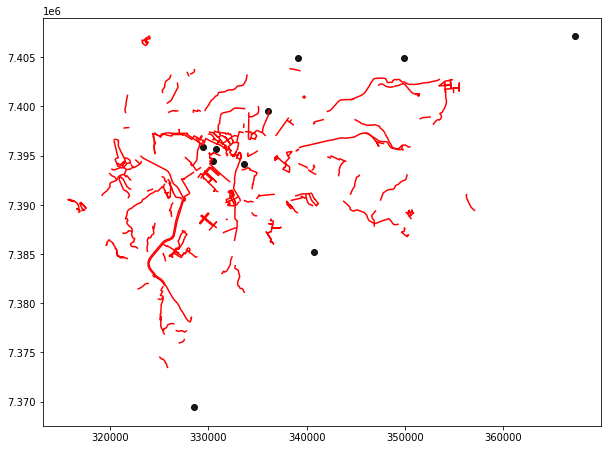

In [10]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf_origin.sample(10, random_state=42).plot(ax= ax, color="black", alpha=.90)
df_ciclo.plot(ax= ax, color="red")

In [103]:
df_ciclo["comprimento"] = df_ciclo["Descriptio"].str.replace("km", ",0").str.extract(r'Extensão: ([0-9]{1,2},*[0-9]{1,2}?)')[0].str.replace(",", ".").astype(float)

In [122]:
df_ciclo_new = df_ciclo[df_ciclo["comprimento"] > 1.5*2]
df_ciclo_new.shape[0]

55

In [167]:
type(a)

shapely.geometry.multilinestring.MultiLineString

In [123]:
from shapely.ops import unary_union

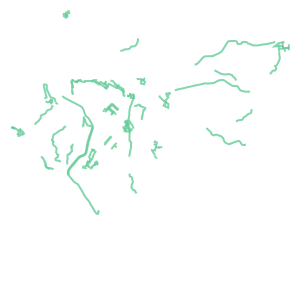

In [124]:
unary_union(df_ciclo_new["geometry"])

In [125]:
a = unary_union(df_ciclo_new["geometry"])

In [126]:
df_eu = pd.DataFrame.from_dict({"Identifica pessoa": ["eu", "Looh", "Paraisópolis"], "Coordenada X Origem": [
                               326_673.0, 327_596.0, 324_066], "Coordenada Y Origem": [7_397_413.0, 7_392_871.0, 7387396]})

gdf_eu = gpd.GeoDataFrame(df_eu, geometry=gpd.points_from_xy(
    df_eu["Coordenada X Origem"], df_eu["Coordenada Y Origem"]))

In [127]:
gdf_eu

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry
0,eu,326673.0,7397413.0,POINT (326673.000 7397413.000)
1,Looh,327596.0,7392871.0,POINT (327596.000 7392871.000)
2,Paraisópolis,324066.0,7387396.0,POINT (324066.000 7387396.000)


In [129]:
df_ciclo_new.head(10)

,Name,Descriptio,geometry,comprimento
0,Ciclovia Caminho Verde,Extensão: 12km<br>Inauguração: 27 de Setembro ...,"LINESTRING Z (349705.928 7395671.119 0.000, 34...",12.0
3,Ciclovia Adutora Rio Claro,Extensão: 7km<br>Inauguração: 16 de Janeiro de...,"LINESTRING Z (349376.624 7388039.973 0.000, 34...",7.0
4,Ciclovia Rio Pinheiros,"Extensão: 21,5km<br>Inauguração: 27 de Feverei...","LINESTRING Z (328359.153 7378626.505 0.000, 32...",21.5
5,Ciclovia Parque Ecologico do Tietê,"Extensão: 11,41km<br>Inauguração: 30 de Outubr...","LINESTRING Z (342038.258 7399481.259 0.000, 34...",11.4
6,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração: 20 de Julho de...","LINESTRING Z (327346.320 7384796.163 0.000, 32...",5.6
7,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração: 20 de Julho de...","LINESTRING Z (326533.813 7385089.189 0.000, 32...",5.6
8,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração: 20 de Julho de...","LINESTRING Z (326198.975 7384940.627 0.000, 32...",5.6
9,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração: 20 de Julho de...","LINESTRING Z (326547.564 7385295.229 0.000, 32...",5.6
10,Ciclorrota Brooklin,"Extensão: 5,6km<br>Inauguração:20 de Julho de ...","LINESTRING Z (327647.499 7387393.377 0.000, 32...",5.6
13,Ciclorrota Moema,"Extensão: 3,2km<br>Inauguração: 05 de Novembro...","LINESTRING Z (330881.998 7387650.428 0.000, 33...",3.2


<AxesSubplot:>

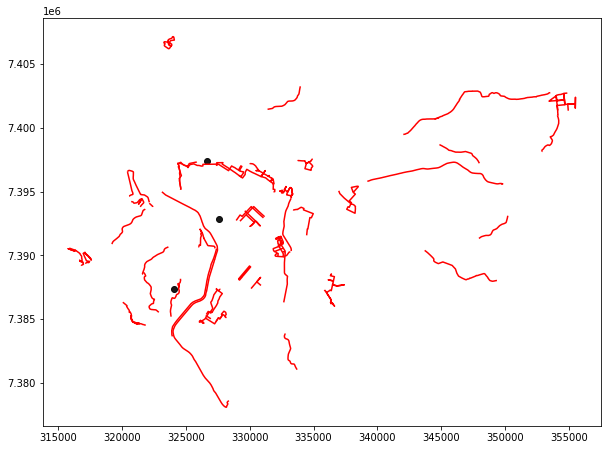

In [134]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf_eu.plot(ax= ax, color="black", alpha=.90)
df_ciclo_new.plot(ax= ax, color="red")

In [135]:
gdf_eu["geometry"].apply(lambda x: a.distance(x))

0     263.263489
1    1275.997255
2     365.481934
Name: geometry, dtype: float64

In [163]:
gdf_sample = gdf_origin.sample(10000, random_state=0)
gdf_sample["distance_ciclo"] = gdf_sample["geometry"].apply(lambda x: a.distance(x))

<AxesSubplot:>

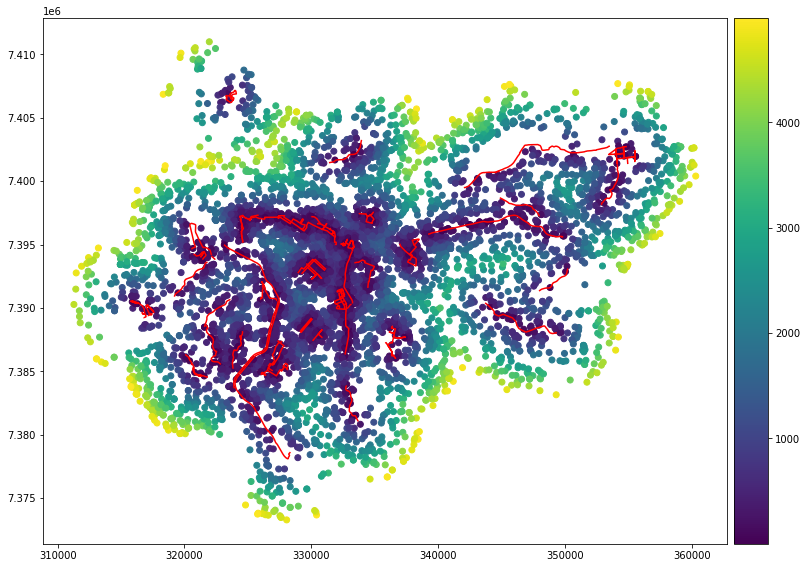

In [166]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f = 1.3
fig, ax = plt.subplots(1, figsize=(10*f,10*f))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf_sample[gdf_sample["distance_ciclo"] < 5000].plot(ax= ax, column="distance_ciclo", legend=True, cax=cax)
df_ciclo_new.plot(ax= ax, color="red")